In [30]:
import pandas as pd
from pathlib import Path
import numpy as np
 


data_dir = r'C:\SportsProject\premier_team_analysis\data'

player_stats_df = pd.read_csv(f'{data_dir}/player_stats.csv')
player_salaries_df = pd.read_csv(f'{data_dir}/player_salaries.csv')
team_stats_df = pd.read_csv(f'{data_dir}/team_stats.csv')
standings_df = pd.read_csv(f'{data_dir}/standings.csv')
fixtures_df = pd.read_csv(f'{data_dir}/fixtures.csv')
team_salary_df = pd.read_csv(f'{data_dir}/team_salary.csv')
player_possession_stats_df = pd.read_csv(f'{data_dir}/player_possession_stats.csv')
team_possession_stats_df = pd.read_csv(f'{data_dir}/team_possession_stats.csv')


#Code from https://www.kaggle.com/code/astonvaz/stats-don-t-lie-premier-league-24-25-deep-dive

df_dict = {
    'team_possession_stats': team_possession_stats_df,
    'player_possession_stats': player_possession_stats_df,
    'team_salary': team_salary_df,
    'standings': standings_df,
    'team_stats': team_stats_df,
    'player_salaries': player_salaries_df,
    'fixtures': fixtures_df,
    'player_stats': player_stats_df
}

def print_df_shape(name, dataframe):
    """Displays dataframe name and shape"""
    print(f"{name} Dataset shape: {dataframe.shape}\n")
    
def display_column_names(name, dataframe):
    """Displays column names in a dataframe"""
    print(f"{name} columns:\n{dataframe.columns.tolist()} \n")
    
def display_first_five_rows(table_name, dataframe):
    print(f"{table_name} data:")
    print(f"{dataframe.head(5)}\n\n")
    
def display_data_types(name, dataframe):
    print(f"{name} data types:")
    print(f"{dataframe.info()}\n")
    


C:\Users\bield\AppData\Local\Temp\ipykernel_26148\581019795.py:39: UserWarning: Glyph 152 (\x98) missing from current font.
  plt.tight_layout()
c:\Users\bield\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


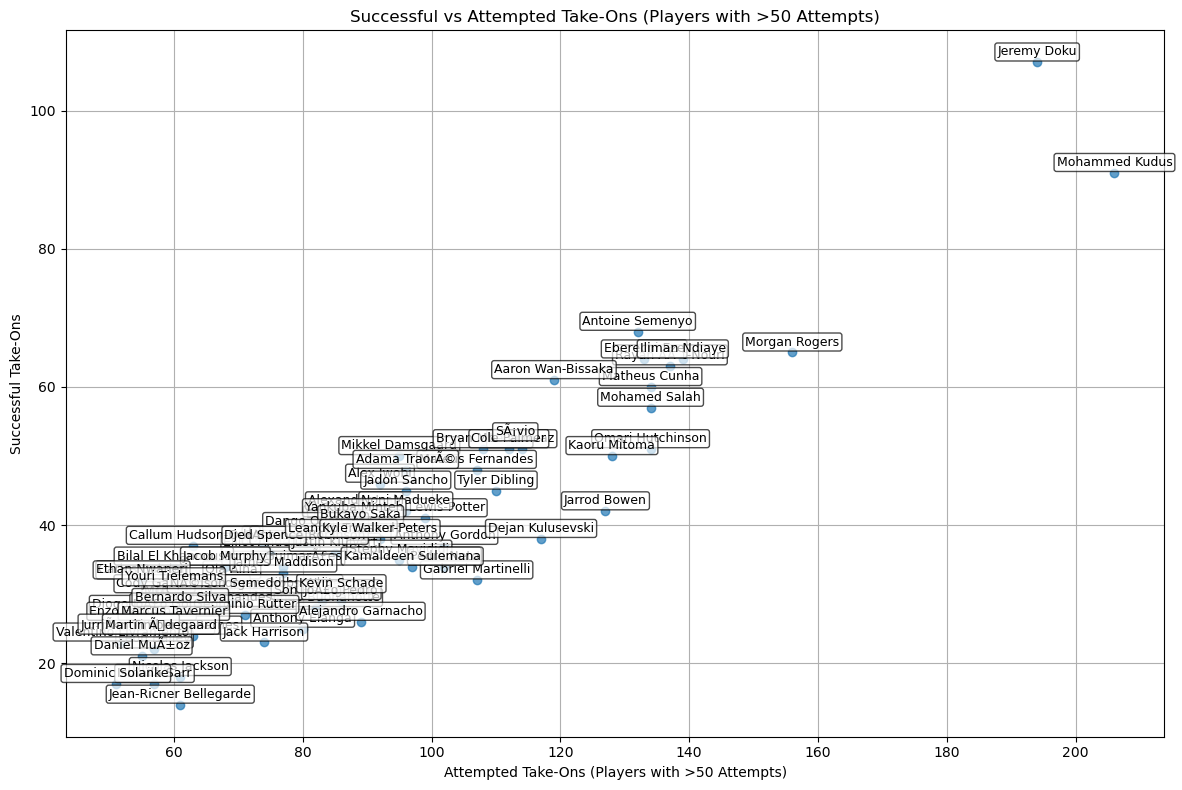

In [46]:
import matplotlib.pyplot as plt

# Extract the DataFrame
player_possession_stats = df_dict['player_possession_stats']

# Define the minimal attempts threshold
MINIMAL_ATTEMPTS = 50

# Filter players with attempts above the threshold
high_attempt_players = player_possession_stats[player_possession_stats['attempted_take_ons'] > MINIMAL_ATTEMPTS]

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(
    high_attempt_players['attempted_take_ons'],
    high_attempt_players['successful_take_ons'],
    alpha=0.7
)

# Add player names as annotations
for i, row in high_attempt_players.iterrows():
    plt.annotate(
        row['player'],  # Replace with the correct column name if needed
        (row['attempted_take_ons'], row['successful_take_ons']),
        textcoords="offset points",
        xytext=(0, 5),  # Small vertical offset
        ha='center',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    )

# Use f-string for dynamic labeling
plt.xlabel(f'Attempted Take-Ons (Players with >{MINIMAL_ATTEMPTS} Attempts)')
plt.ylabel('Successful Take-Ons')
plt.title(f'Successful vs Attempted Take-Ons (Players with >{MINIMAL_ATTEMPTS} Attempts)')
plt.grid(True)

# Adjust layout to prevent label clipping
plt.tight_layout()
plt.show()

In [47]:
merged_df = player_possession_stats.merge(
    player_stats[['name', 'goals', 'assists']],
    left_on='player',  # Column in player_possession_stats
    right_on='name',   # Column in player_stats
    how='left'
)

# Drop the redundant 'name' column if needed
merged_df = merged_df.drop(columns=['name'])



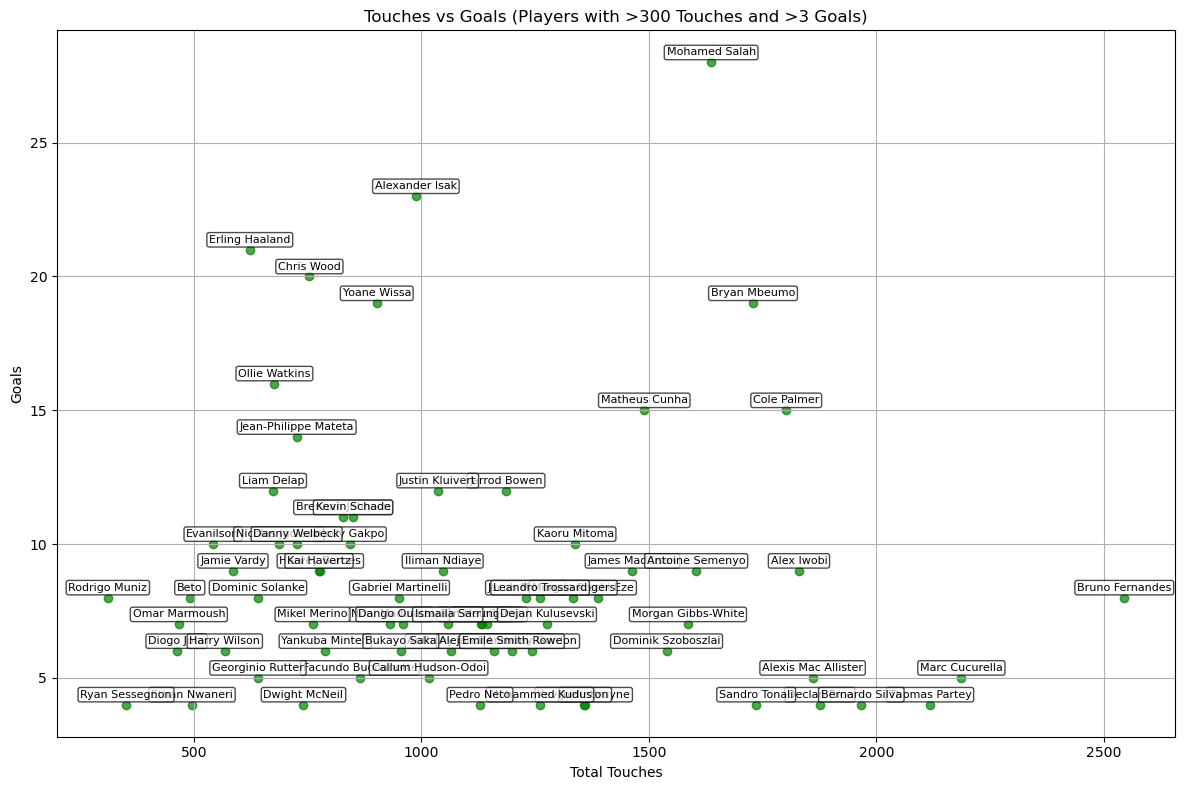

In [48]:
# Define a threshold for minimum touches (optional)
MIN_TOUCHES = 300  # Adjust as needed
MIN_GOALS = 3  # Adjust as needed
filtered_df = merged_df[merged_df['touches'] > MIN_TOUCHES]
filtered_df = merged_df[merged_df['goals'] > MIN_GOALS]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df['touches'],
    filtered_df['goals'],
    alpha=0.7,
    color='green'
)

# Annotate player names
for i, row in filtered_df.iterrows():
    plt.annotate(
        row['player'],  # Adjust column name if needed
        (row['touches'], row['goals']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    )

plt.xlabel('Total Touches')
plt.ylabel('Goals')
plt.title(f'Touches vs Goals (Players with >{MIN_TOUCHES} Touches and >{MIN_GOALS} Goals)')
plt.grid(True)
plt.tight_layout()
plt.show()

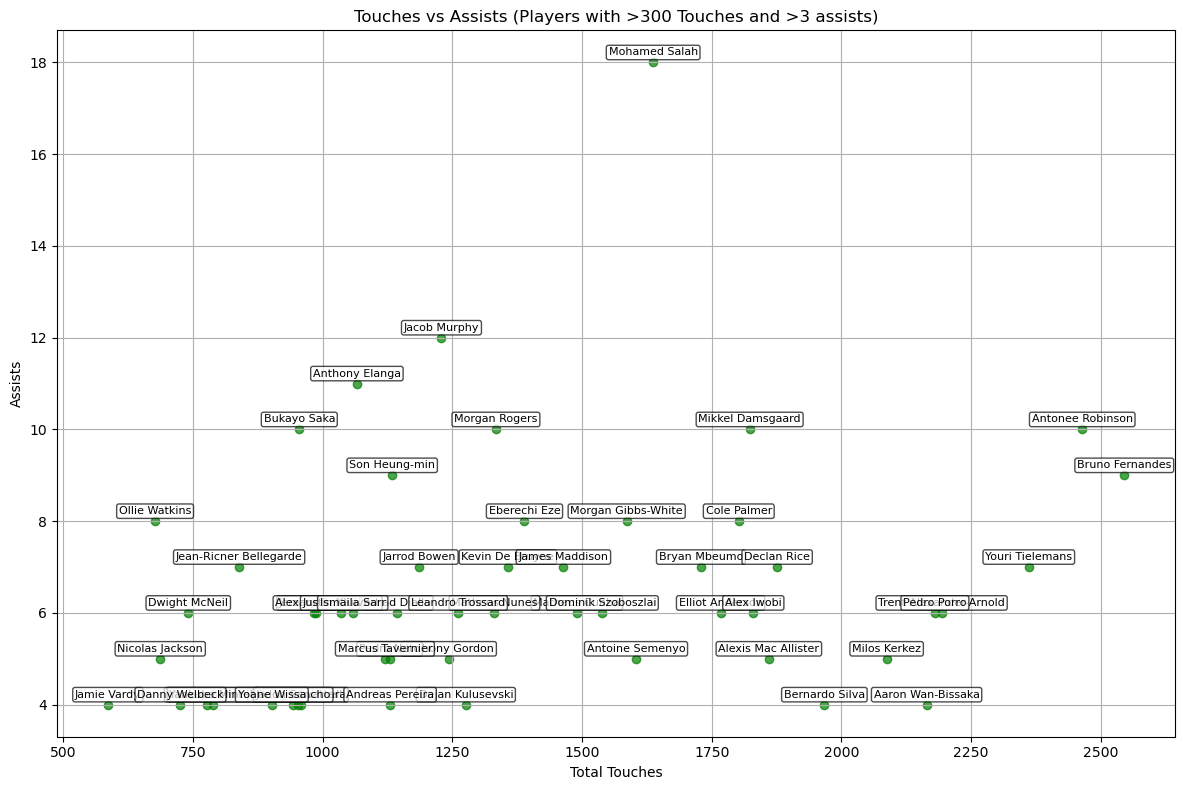

In [50]:
MIN_TOUCHES = 300  # Adjust as needed
MIN_ASSISTS = 3  # Adjust as needed
filtered_df = merged_df[merged_df['touches'] > MIN_TOUCHES]
filtered_df = merged_df[merged_df['assists'] > MIN_ASSISTS]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df['touches'],
    filtered_df['assists'],
    alpha=0.7,
    color='green'
)

# Annotate player names
for i, row in filtered_df.iterrows():
    plt.annotate(
        row['player'],  # Adjust column name if needed
        (row['touches'], row['assists']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    )

plt.xlabel('Total Touches')
plt.ylabel('Assists')
plt.title(f'Touches vs Assists (Players with >{MIN_TOUCHES} Touches and >{MIN_ASSISTS} assists)')
plt.grid(True)
plt.tight_layout()
plt.show()


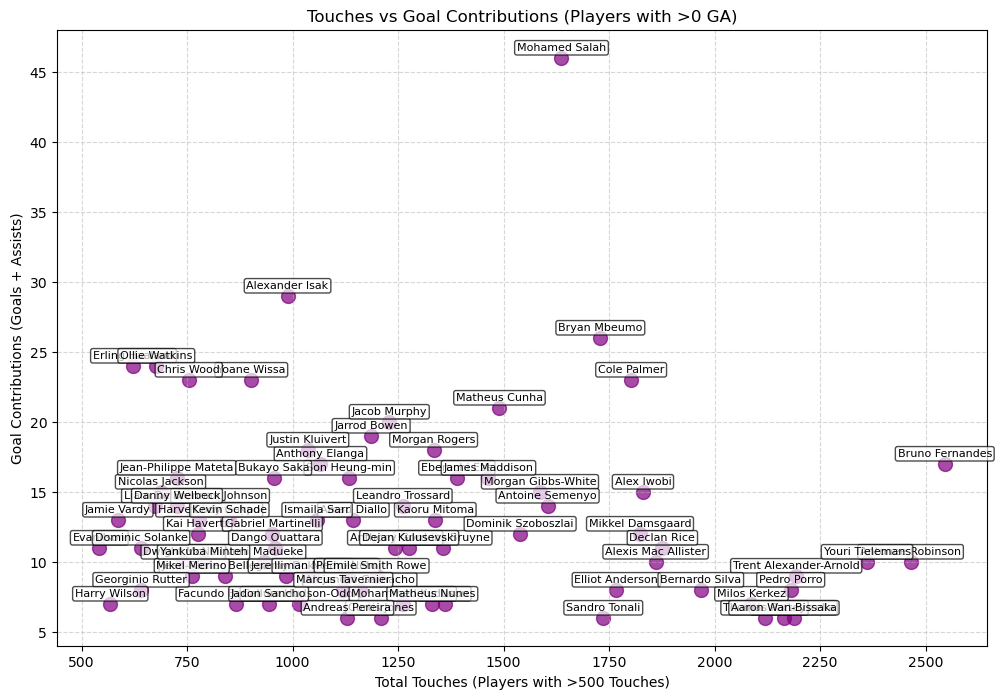

In [ ]:
# Calculate Goal Contributions (GA = Goals + Assists)
merged_df['GA'] = merged_df['goals'] + merged_df['assists']

# Filter players with >300 touches and >3 GA
MIN_TOUCHES = 500
MIN_GA = 5
filtered_df = merged_df[
    (merged_df['touches'] > MIN_TOUCHES) & 
    (merged_df['GA'] > MIN_GA)
]

# --- Plot: Touches vs Goal Contributions (GA) ---
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df['touches'],
    filtered_df['GA'],
    alpha=0.7,
    color='purple',  # Distinct color for GA
    s=100  # Adjust point size
)

# Annotate player names
for i, row in filtered_df.iterrows():
    plt.annotate(
        row['player'],  # Use 'name' if you kept it after merging
        (row['touches'], row['GA']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    )

# Add labels and title
plt.xlabel(f'Total Touches (Players with >{MIN_TOUCHES} Touches)')
plt.ylabel('Goal Contributions (Goals + Assists)')
plt.title(f'Touches vs Goal Contributions (Players with >{MIN_GA} GA)')
plt.grid(True, linestyle='--', alpha=0.5)



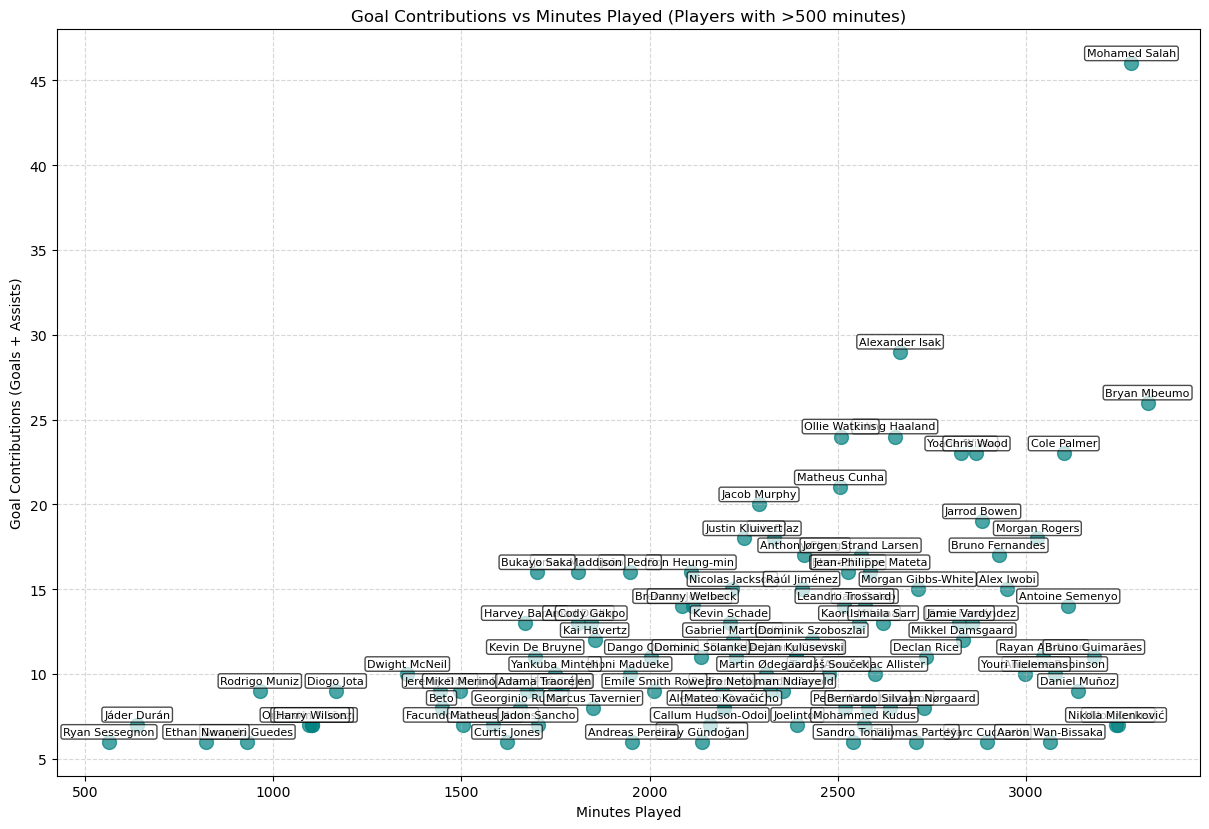

In [52]:
# Calculate Goal Contributions (GA = Goals + Assists)
player_stats['GA'] = player_stats['goals'] + player_stats['assists']

# Filter players with minimum minutes (optional)
MIN_MINUTES = 500  # Adjust as needed
MIN_GA = 5  # Adjust as needed
player_stats = player_stats[player_stats['GA'] > MIN_GA]
filtered_df = player_stats[player_stats['minutes'] > MIN_MINUTES]

# --- Plot: Goal Contributions vs Minutes Played ---
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df['minutes'],
    filtered_df['GA'],
    alpha=0.7,
    color='teal',  # Distinct color
    s=100
)



# Annotate top performers (e.g., GA > 5)
for i, row in filtered_df[filtered_df['GA'] > 5].iterrows():
    plt.annotate(
        row['name'],  # Use 'player' if column name differs
        (row['minutes'], row['GA']),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7)
    )

plt.tight_layout()
        
# Add labels and title
plt.xlabel('Minutes Played')
plt.ylabel('Goal Contributions (Goals + Assists)')
plt.title(f'Goal Contributions vs Minutes Played (Players with >{MIN_MINUTES} minutes)')
plt.grid(True, linestyle='--', alpha=0.5)